In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv


In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for formattting and handling text 
import string 
import re

#Library for nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS


#Library for Splitting Dataset
from sklearn.model_selection import train_test_split


#Libraries for NN
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

from tensorflow.keras.utils import plot_model

#Library for evaluation
from sklearn import metrics
from functools import reduce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint, EarlyStopping



import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/ 

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/co

In [27]:
test_data = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv')
test_labels = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv')

In [49]:
test_labels = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv')

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [5]:
data = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv')

In [6]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
print(f"data shape {data.shape}\n\n")
print(f"na summary{data.isna().sum()}\n\n")
print(f'data summary{data.describe()}')

data shape (159571, 8)


na summaryid               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


data summary               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         

In [8]:
int_cols = data.select_dtypes(include='int').columns
for col in int_cols:
    print(f"{col},values {data[col].value_counts()} \n\n")

toxic,values 0    144277
1     15294
Name: toxic, dtype: int64 


severe_toxic,values 0    157976
1      1595
Name: severe_toxic, dtype: int64 


obscene,values 0    151122
1      8449
Name: obscene, dtype: int64 


threat,values 0    159093
1       478
Name: threat, dtype: int64 


insult,values 0    151694
1      7877
Name: insult, dtype: int64 


identity_hate,values 0    158166
1      1405
Name: identity_hate, dtype: int64 




In [9]:
data[data['obscene'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
159411,fd2f53aafe8eefcc,Fat piece of shit \n\nyou obese piece of shit....,1,0,1,0,1,0
159493,fef142420a215b90,FUCKING FAGGOT \n\nLOLWAT.,1,0,1,0,1,0
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0


In [10]:
df = data.copy()
df['toxicity'] = (data[int_cols].sum(axis=1) > 0 ).astype(int)

In [11]:
df = df[['comment_text','toxicity']]
df.rename(columns = {'comment_text':'text'},inplace = True)

In [12]:
df.toxicity.unique()

array([0, 1])

In [13]:
class Clean:
    def __init__(self, data, col_name = 'text'):
        self.data = data
        self.col_name = col_name
        self.clean_data = self.process()
        
    def remove_URL(self, text):
        return re.sub(r"http[s]?://\S+", "", text)
    
    def remove_emoji(self,text):
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    def remove_HTML(self, text):
        return re.sub(r"<.*?>", "", text)
    
    def remove_punc(self, text):
        return re.sub('[^a-zA-Z]', ' ', text)
    
    def process(self):
        lemmatizer = WordNetLemmatizer()
        stop_words = set(stopwords.words('english'))
        stop_words.update(['was','does','has','n','s','t'])
        funcs = [self.remove_URL, self.remove_emoji, self.remove_HTML,
                self.remove_punc]
        df = pd.DataFrame()
        df = self.data.copy()
        df[self.col_name] = df[self.col_name].apply(lambda x: x.lower())
        df[self.col_name] = df[self.col_name].apply(lambda x: " "
                                                        .join([word for word in word_tokenize(x) if word not in stop_words]))
        index = 0
        for func in funcs:
            df[self.col_name] = df[self.col_name].apply(lambda x: x.lower())
            
            df[self.col_name] = df[self.col_name].apply(lambda x: func(x))    
            
            df[self.col_name] = df[self.col_name].apply(lambda x:
                                                    ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
        df[self.col_name] = df[self.col_name].apply(lambda x: " "
                                                        .join([word for word in word_tokenize(x) if word not in stop_words]))
        
        return df
    def get_clean_data(self):
        return self.clean_data

In [14]:
clean = Clean(df)


In [15]:
df =clean.get_clean_data()

In [16]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
data.iloc[16]

id                                                0007e25b2121310b
comment_text     Bye! \n\nDon't look, come or think of comming ...
toxic                                                            1
severe_toxic                                                     0
obscene                                                          0
threat                                                           0
insult                                                           0
identity_hate                                                    0
Name: 16, dtype: object

In [18]:
toxic = df[df['toxicity']==1]
non_toxic = df[df['toxicity']==0]


toxic

,text,toxicity
6,cocksucker piss around work,1
12,hey talk exclusive group wp taliban good destr...,1
16,bye look come think comming back tosser,1
42,gay antisemmitian archangel white tiger meow g...,1
43,fuck filthy mother dry,1
...,...,...
159494,previous conversation fucking shit eating libe...,1
159514,mischievious pubic hair,1
159541,absurd edits absurd edits great white shark to...,1
159546,hey listen ever delete edits ever annoyed wwe ...,1


In [19]:
for i in range(100):
    print(toxic.iloc[i].text+'\n\n')

cocksucker piss around work


hey talk exclusive group wp taliban good destroying self appointed purist gang one asks question abt anti social destructive non contribution wp ask sityush clean behavior issue nonsensical warning


bye look come think comming back tosser


gay antisemmitian archangel white tiger meow greetingshhh uh two way erased comment ww holocaust brutally slaying jew gay gypsy slav anyone anti semitian shave head bald go skinhead meeting doubt word bible homosexuality deadly sin make pentagram tatoo forehead go satanistic mass gay pal first last warning fucking gay wo appreciate nazi shwain would write page wish talk anymore beware dark side


fuck filthy mother dry


sorry sorry screwed around someone talk page bad know template talk page help assert dominance know bow almighty administrator going go play outside mom


get fucked get fuckeeed got drink cant put get fuck get fucked fucked right


stupid peace shit stop deleting stuff asshole go die fall hole go hell

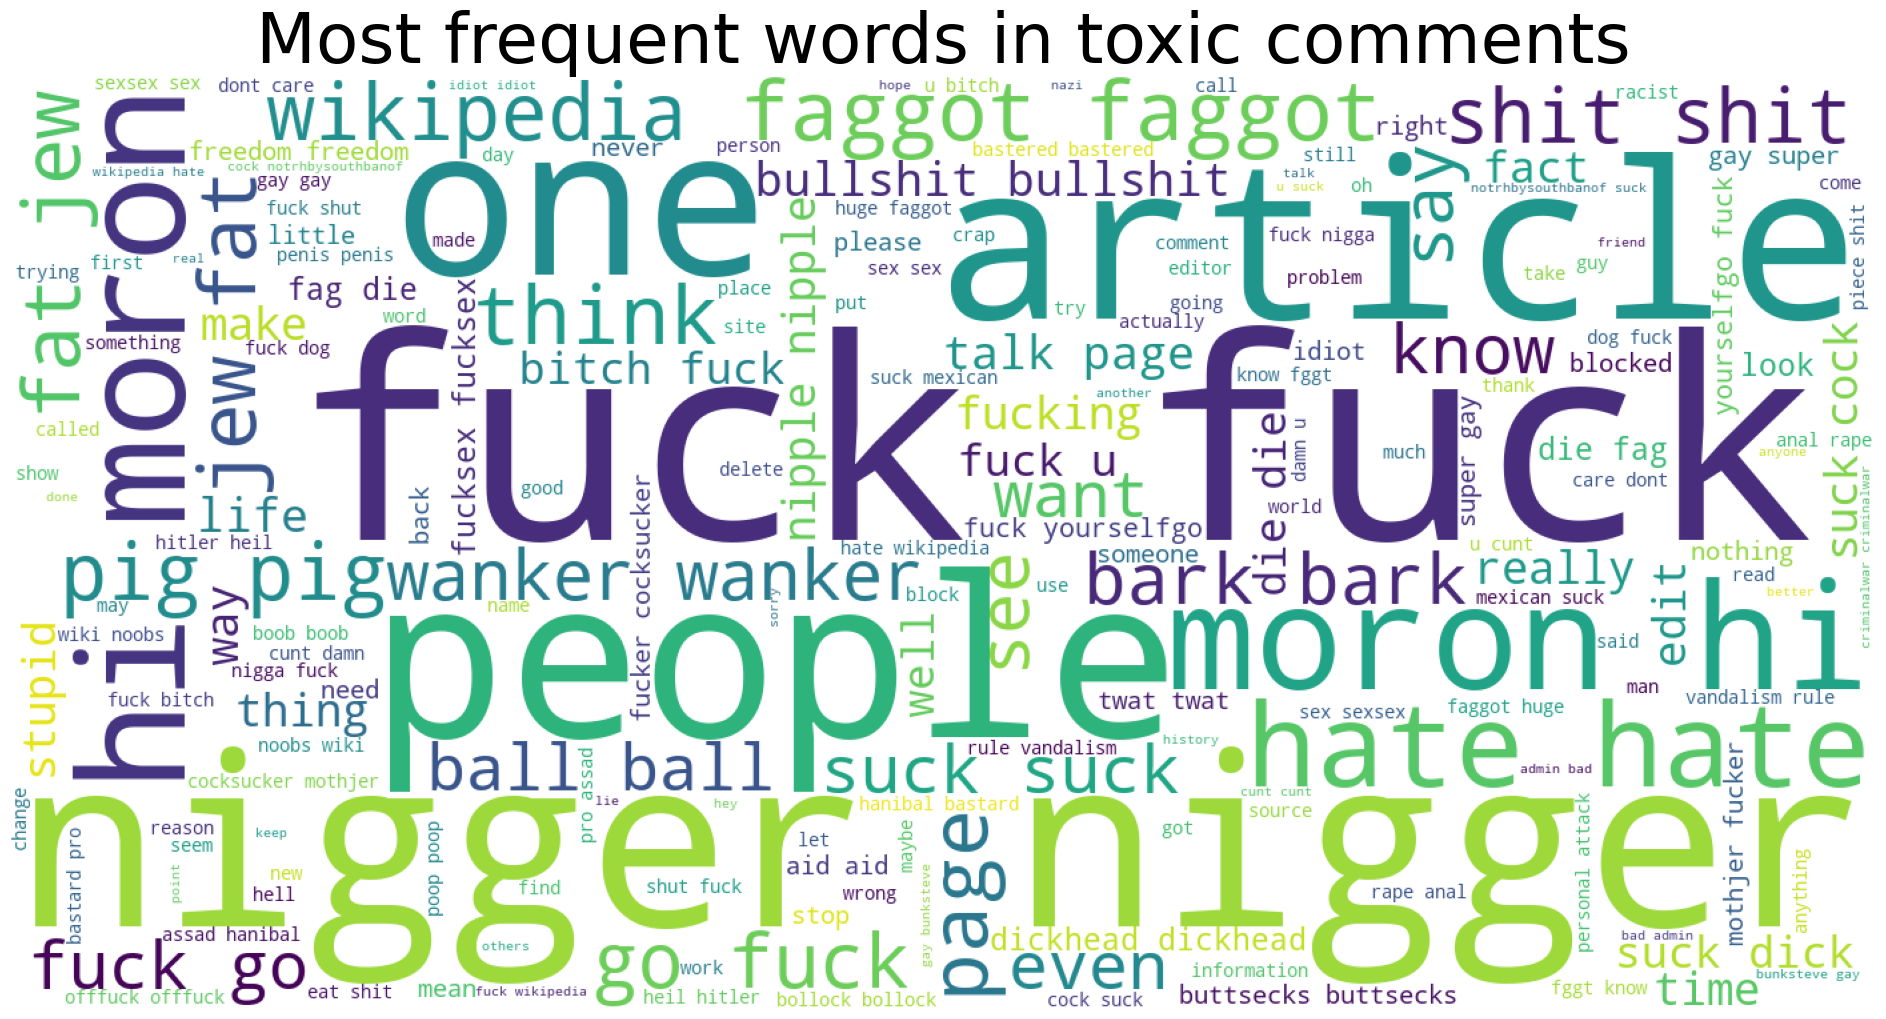

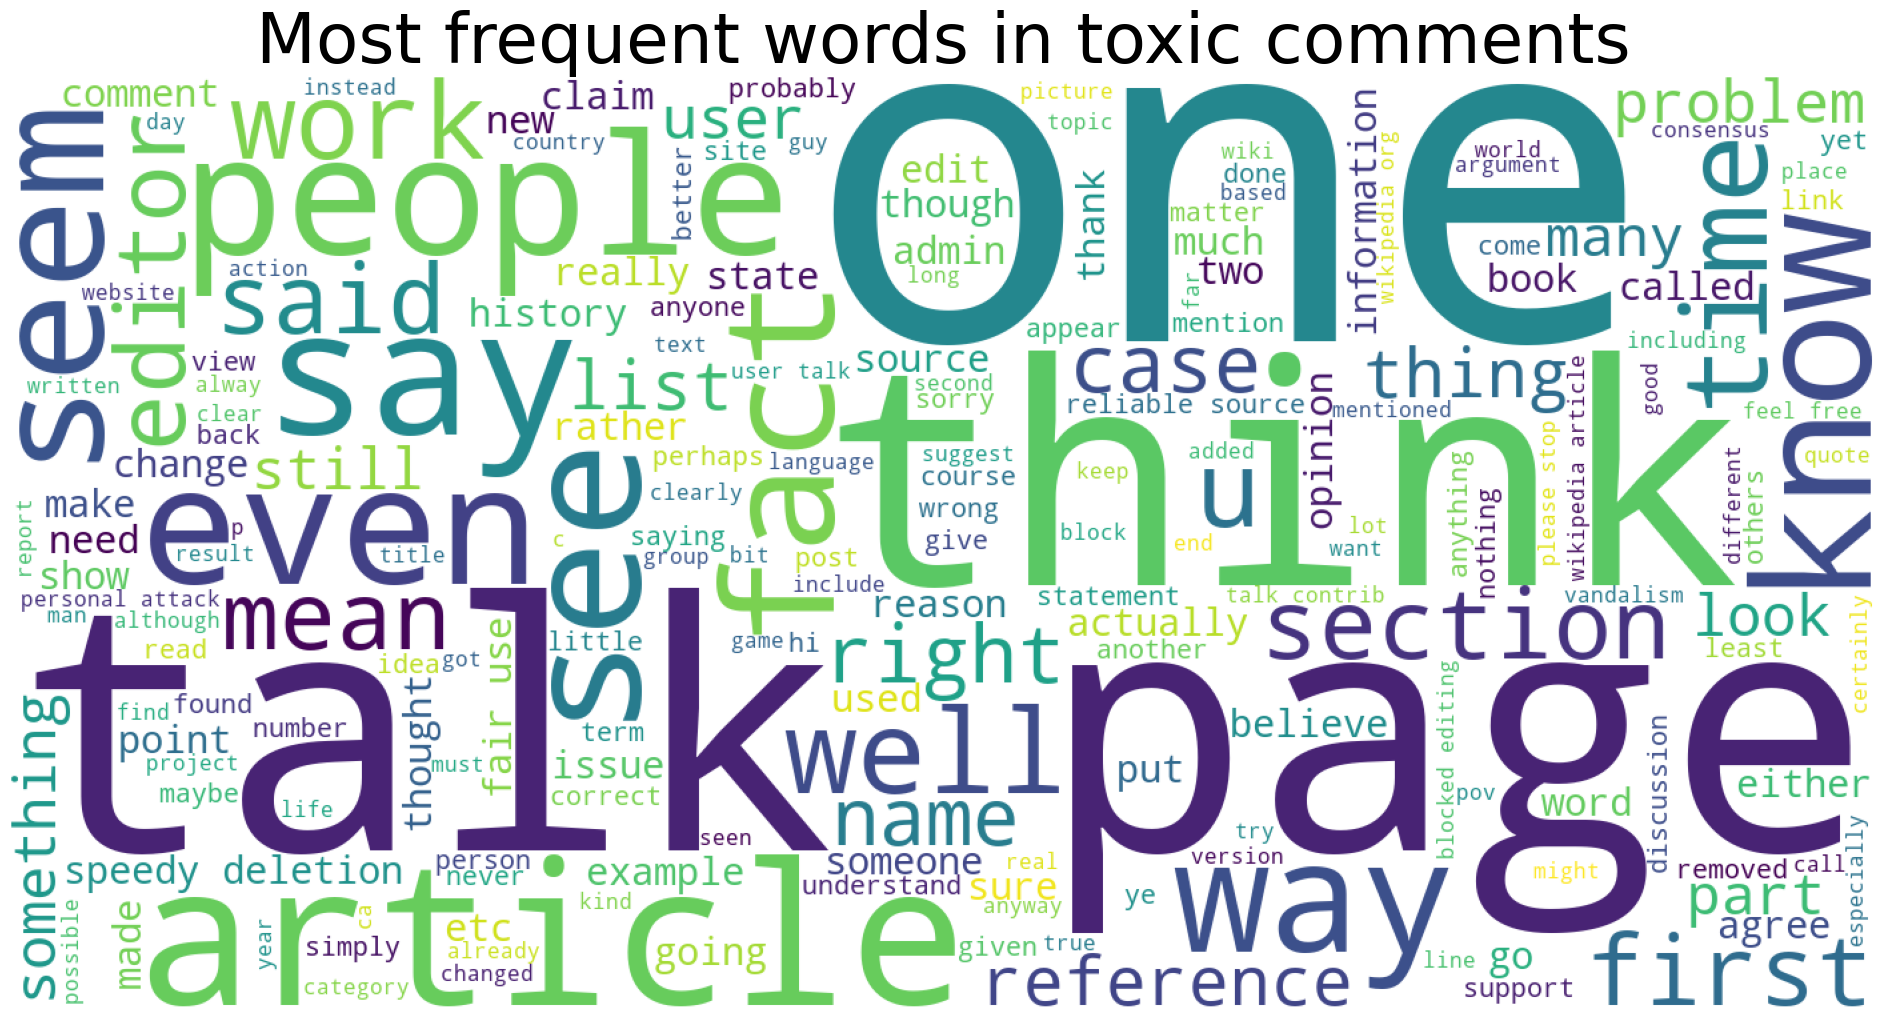

In [20]:
full_data = [toxic,non_toxic]
for d in full_data:
    wordcloud = WordCloud(width = 1400, height = 700,
                      background_color='white').generate(' '.join(d.text.tolist()))
    fig = plt.figure(figsize = (30,10), facecolor='white')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Most frequent words in toxic comments', fontsize=50)
    plt.tight_layout(pad = 0)
    plt.show()

In [21]:
l=50
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X,maxlen=l)
y = df['toxicity']

In [22]:
X

array([[   0,    0,    0, ...,    2,   69, 2931],
       [   0,    0,    0, ...,    4,  811,  101],
       [   0,    0,    0, ..., 2075,  599,  344],
       ...,
       [   0,    0,    0, ...,  599,    1, 2434],
       [   0,    0,    0, ...,  228,   65,   48],
       [   0,    0,    0, ...,  253, 1401, 1659]], dtype=int32)

In [23]:
embed_dim = 100
lstm_out = 100
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.4))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=2e-3)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           300000    
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 50, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

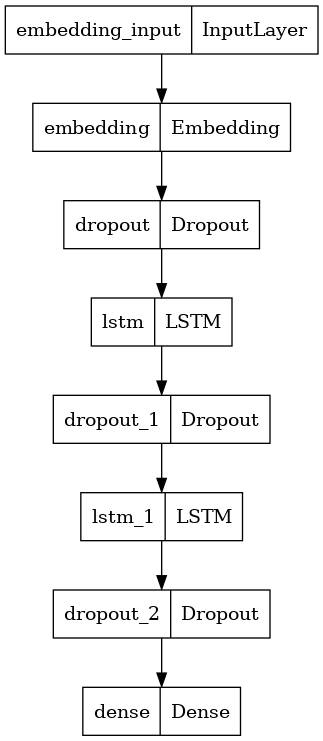

In [24]:
plot_model(model, to_file='model.png')

In [25]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
mc = ModelCheckpoint ('best_model', monitor='val_metric', mode='min', save_best_only=True)



In [26]:
model.fit(X,y, epochs = 5,validation_split = 0.2 ,callbacks=[es_callback], batch_size=32)

Epoch 1/5
3990/3990 [==============================] - 597s 148ms/step - loss: 0.1488 - accuracy: 0.9497 - val_loss: 0.1277 - val_accuracy: 0.9551
Epoch 2/5
3990/3990 [==============================] - 591s 148ms/step - loss: 0.1224 - accuracy: 0.9569 - val_loss: 0.1270 - val_accuracy: 0.9568
Epoch 3/5
3990/3990 [==============================] - 595s 149ms/step - loss: 0.1143 - accuracy: 0.9594 - val_loss: 0.1326 - val_accuracy: 0.9551
Epoch 4/5
3990/3990 [==============================] - 611s 153ms/step - loss: 0.1075 - accuracy: 0.9614 - val_loss: 0.1306 - val_accuracy: 0.9557
Epoch 5/5
3990/3990 [==============================] - 602s 151ms/step - loss: 0.1008 - accuracy: 0.9637 - val_loss: 0.1359 - val_accuracy: 0.9560


In [30]:
test_data


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [37]:
test_data.rename(columns={'comment_text':'text'},inplace = True)

In [38]:
test_data

,id,text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [39]:
clean = Clean(test_data,'text')

In [40]:
test_clean = clean.get_clean_data()

In [41]:
test_clean

,id,text
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...
1,0000247867823ef7,rfc title fine imo
2,00013b17ad220c46,source zawe ashton lapland
3,00017563c3f7919a,look back source information updated correct f...
4,00017695ad8997eb,anonymously edit article
...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...


In [43]:
l=50
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(test_clean['text'].values)
X_test = tokenizer.texts_to_sequences(test_clean['text'].values)
X_test = pad_sequences(X,maxlen=l)


In [44]:
test_clean['prediction']= model.predict(X)

4787/4787 [==============================] - 118s 25ms/step


In [45]:
test_clean

,id,text,prediction
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,0.259018
1,0000247867823ef7,rfc title fine imo,0.003635
2,00013b17ad220c46,source zawe ashton lapland,0.079490
3,00017563c3f7919a,look back source information updated correct f...,0.002799
4,00017695ad8997eb,anonymously edit article,0.020439
...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,0.061748
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,0.472761
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,0.019908
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,0.000312


In [46]:
test_labels

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [51]:
submission = test_clean[['id','prediction']]

In [52]:
submission

,id,prediction
0,00001cee341fdb12,0.259018
1,0000247867823ef7,0.003635
2,00013b17ad220c46,0.079490
3,00017563c3f7919a,0.002799
4,00017695ad8997eb,0.020439
...,...,...
153159,fffcd0960ee309b5,0.061748
153160,fffd7a9a6eb32c16,0.472761
153161,fffda9e8d6fafa9e,0.019908
153162,fffe8f1340a79fc2,0.000312


In [53]:
submission.to_csv('submission.csv',index=False)